In [55]:
import pandas as pd
import re 

data = pd.read_csv('/home/liyan/Desktop/Capstone Project_II/Reviews.csv')
data.head(2)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...


In [56]:
df = data.iloc[:, [4,5,6,8,9]]
df.head()

,HelpfulnessNumerator,HelpfulnessDenominator,Score,Summary,Text
0,1,1,5,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,0,0,1,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,1,1,4,"""Delight"" says it all",This is a confection that has been around a fe...
3,3,3,2,Cough Medicine,If you are looking for the secret ingredient i...
4,0,0,5,Great taffy,Great taffy at a great price. There was a wid...


In [57]:
# make all non-text value integer
df.iloc[:, 1:3] = df.iloc[:, 1:3].astype('int')


/home/liyan/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [58]:
df[df.Score < 3].head(2)

,HelpfulnessNumerator,HelpfulnessDenominator,Score,Summary,Text
1,0,0,1,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
3,3,3,2,Cough Medicine,If you are looking for the secret ingredient i...


In [59]:
df['Feedback'] = ""
df.loc[df[df.Score < 3].index,'Feedback'] = 'Negative'
df.loc[df[df.Score > 3].index,'Feedback'] = 'Positive'
df.loc[df[df.Score == 3].index,'Feedback'] = 'Neutral'
df.head(10)


/home/liyan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/liyan/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,HelpfulnessNumerator,HelpfulnessDenominator,Score,Summary,Text,Feedback
0,1,1,5,Good Quality Dog Food,I have bought several of the Vitality canned d...,Positive
1,0,0,1,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,Negative
2,1,1,4,"""Delight"" says it all",This is a confection that has been around a fe...,Positive
3,3,3,2,Cough Medicine,If you are looking for the secret ingredient i...,Negative
4,0,0,5,Great taffy,Great taffy at a great price. There was a wid...,Positive
5,0,0,4,Nice Taffy,I got a wild hair for taffy and ordered this f...,Positive
6,0,0,5,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...,Positive
7,0,0,5,"Wonderful, tasty taffy",This taffy is so good. It is very soft and ch...,Positive
8,1,1,5,Yay Barley,Right now I'm mostly just sprouting this so my...,Positive
9,0,0,5,Healthy Dog Food,This is a very healthy dog food. Good for thei...,Positive


In [60]:
df.isnull().sum()

HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Summary                   27
Text                       0
Feedback                   0
dtype: int64

In [61]:
df = df.drop(df.index[df.Summary.isnull()])
df.head(2)

,HelpfulnessNumerator,HelpfulnessDenominator,Score,Summary,Text,Feedback
0,1,1,5,Good Quality Dog Food,I have bought several of the Vitality canned d...,Positive
1,0,0,1,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,Negative


In [62]:
df = df[df.HelpfulnessDenominator.values >10]
df.head(2)

,HelpfulnessNumerator,HelpfulnessDenominator,Score,Summary,Text,Feedback
32,19,19,4,Best of the Instant Oatmeals,McCann's Instant Oatmeal is great if you must ...,Positive
33,13,13,4,Good Instant,This is a good instant oatmeal from the best o...,Positive


In [63]:
import numpy as np

df['Helpfulness_Ratio']=""
df['Helpfulness_Ratio']=df['HelpfulnessNumerator']/df['HelpfulnessDenominator']


In [64]:
#df.loc[df[df.Score < 3].index,'Feedback'] = 'Negative'

df['Helpful?']=""
mean = np.mean(df['Helpfulness_Ratio'])
df.loc[df[df.Helpfulness_Ratio > mean].index,'Helpful?'] = 'Yes'
df.loc[df[df.Helpfulness_Ratio < mean].index,'Helpful?'] = 'No'
df.head(6)

,HelpfulnessNumerator,HelpfulnessDenominator,Score,Summary,Text,Feedback,Helpfulness_Ratio,Helpful?
32,19,19,4,Best of the Instant Oatmeals,McCann's Instant Oatmeal is great if you must ...,Positive,1.000000,Yes
33,13,13,4,Good Instant,This is a good instant oatmeal from the best o...,Positive,1.000000,Yes
82,15,15,5,Forget Molecular Gastronomy - this stuff rocke...,I know the product title says Molecular Gastro...,Positive,1.000000,Yes
158,17,19,5,tastes very fresh,"<span class=""tiny""> Length:: 0:26 Mins<br /><b...",Positive,0.894737,Yes
287,13,13,5,Great Natural Energy,"This is a fantastic product, and I wish it was...",Positive,1.000000,Yes
324,5,19,1,Never Arrived,So we cancelled the order. It was cancelled w...,Negative,0.263158,No


In [65]:
df.isnull().sum()

HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Summary                   0
Text                      0
Feedback                  0
Helpfulness_Ratio         0
Helpful?                  0
dtype: int64

In [66]:
# convert text to lower case
df.loc[:, 'Text'] = df['Text'].str.lower()
df["Text"].head()

32     mccann's instant oatmeal is great if you must ...
33     this is a good instant oatmeal from the best o...
82     i know the product title says molecular gastro...
158    <span class="tiny"> length:: 0:26 mins<br /><b...
287    this is a fantastic product, and i wish it was...
Name: Text, dtype: object

In [67]:

import numpy as np
wordslist = []
for i in range(len(df)):
    sub = list(filter(lambda x:re.match("^[a-zA-Z]+$",x),[x for x in set(re.split("[\s:/,.:]", df.Text.iloc[i]))]))
    sub = format(' '.join(sub))
    wordslist.append(sub)
    
wordslist

['so too three brand decide corn prepared all minutes good why two preparation harmful and stovetop oatmeal adding can like when convenient product that boiling while is great taste not oats have water make store tastes near bowl fructose gluey microwave you use the heat i creamy gum only other must without helped actual in variety buy an plus though fact or should it time still stuff pack syrup thick than need brands together however better for instead real requiring no maybe one tasty best instant nowhere extreme even do be scrape cane sugar varieties a thickeners as this after by high prepare issue becomes organic tried if escaping of sitting your thing to guar me gets convenience there but',
 'cinnamon plus does so make too brand or doctoring require uses three it sugar time cane corn a oats syrup regular morning cut maple brown you this good the now apple form high on from and tell oatmeal doctors apart better of for when only steel actually some instead they cold to sweetness fla

In [68]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(min_df=0)
vectorizer.fit(wordslist)
x = vectorizer.transform(wordslist)
x = x.toarray()
print("")
print("Transformed text vector is \n{}".format(x))



Transformed text vector is 
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [69]:
x.shape

(21438, 32393)

In [70]:
df.Score.unique()

array([4, 5, 1, 2, 3])

In [71]:
def make_xy(df, vectorizer=None):
    #Your code here    
    if vectorizer is None:
        vectorizer = CountVectorizer()  #Convert a collection of text documents to a matrix of token counts
    X = vectorizer.fit_transform(wordslist) # a list of integers transformed from all text
    X = X.tocsc()  # some versions of sklearn return COO format
    y = (df.Feedback == 'Positive').values # Positive =1
    return X, y
X, y = make_xy(df)


In [72]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
X, y = make_xy(df)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3)
clf = MultinomialNB().fit(X_train, y_train)
# MultinomialNB() is for classification with dicrete features. In this case, freshness and text in integers.
print ('Accuracy on training set: {}'.format(clf.score(X_train, y_train)))
print ('Accuracy on testing set:  {}'.format(clf.score(X_test, y_test)))

Accuracy on training set: 0.8858456617353059
Accuracy on testing set:  0.8353544776119403


In [73]:
X_array = X_train.toarray()
doc_sum = X_array.sum(axis = 0) # The number of times each word is occuring over all the documents.
len_text = len(doc_sum) # number of unique words in all documents
sum(doc_sum <= 5)/len_text # words that occur in all documuents five times or less

0.7028370326922483

Text(0.5,1,'% of Words That Appear In <= X Documents, N = 50')

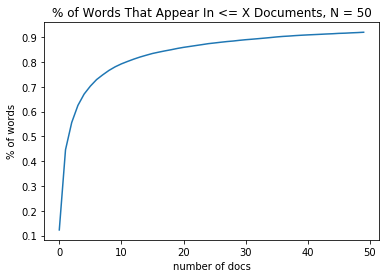

In [74]:
import matplotlib.pyplot as plt

N = 50 
x_ax = np.arange(0,len_text)[:N] # [:N] changes this to only run for x_i values from 0 to 100 
y_ax = [sum(doc_sum <= i)/len_text for i in x_ax]# Determines the percentage values for y_i 

plt.plot(x_ax, y_ax) 
plt.xlabel('number of docs') 
plt.ylabel('% of words') 
plt.title('% of Words That Appear In <= X Documents, N = 50')

In [75]:
from sklearn.model_selection import KFold
def cv_score(clf, X, y, scorefunc):
    result = 0.
    nfold = 5
    for train, test in KFold(nfold).split(X): # split data into train/test groups, 5 times
        clf.fit(X[train], y[train]) # fit the classifier, passed is as clf.
        result += scorefunc(clf, X[test], y[test]) # evaluate score function on held-out data
    return result / nfold # average

In [76]:
def log_likelihood(clf, x, y):
    prob = clf.predict_log_proba(x)
    Negative = y == 0
    Positive = ~Negative
    return prob[Negative, 0].sum() + prob[Positive, 1].sum()

In [77]:
from sklearn.model_selection import train_test_split
_, itest = train_test_split(range(df.shape[0]), train_size=0.7)

mask = np.zeros(df.shape[0], dtype=np.bool)
mask[itest] = True  # training data equals true

/home/liyan/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [78]:
from sklearn.naive_bayes import MultinomialNB

#the grid of parameters to search over
alphas = [.1, 1, 5, 10, 50]
best_min_df = 1 # YOUR TURN: put your value of min_df here.

#Find the best value for alpha and min_df, and the best classifier
best_alpha = None
maxscore=-np.inf
for alpha in alphas:        
    vectorizer = CountVectorizer(min_df=best_min_df) 
    #vectorizer = CountVectorizer()  #Convert a collection of text documents to a matrix of token counts
    # Xthis is the list of integers transformed from all text for each document in critics
    # ythis is the the list of integers to state whether they are fresh or rotten.
    Xthis, ythis = make_xy(df, vectorizer)
    Xtrainthis = Xthis[mask]
    ytrainthis = ythis[mask]
    # your turn
    clf = MultinomialNB(alpha=alpha) # set parameter
    score = cv_score(clf, Xtrainthis, ytrainthis, log_likelihood) # training score
    if score > maxscore:
        maxscore = score
        best_alpha = alpha
print("alpha: {}".format(best_alpha))

alpha: 1


In [79]:
vectorizer = CountVectorizer(min_df=best_min_df)
X, y = make_xy(df, vectorizer)
xtrain=X[mask]
ytrain=y[mask]
xtest=X[~mask]
ytest=y[~mask]

clf = MultinomialNB(alpha=best_alpha).fit(xtrain, ytrain)

#your turn. Print the accuracy on the test and training dataset
training_accuracy = clf.score(xtrain, ytrain)
test_accuracy = clf.score(xtest, ytest)

print("Accuracy on training data: {:2f}".format(training_accuracy))
print("Accuracy on test data:     {:2f}".format(test_accuracy))

Accuracy on training data: 0.893035
Accuracy on test data:     0.817073


In [81]:
words = np.array(vectorizer.get_feature_names())
#vectorizer = CountVectorizer(min_df=best_min_df)
words = np.array(vectorizer.get_feature_names())

x = np.eye(xtest.shape[1]) #Identity matrix for feature names

probs = clf.predict_log_proba(x)[:, 0] # fresh data? '0' for rotten
#predict for each feature (word) - x what is the probability of it being 
#a rotten review (hence the [0]) since predict gives us probabilities for [rotten, fresh]
#clf = MultinomialNB(alpha=best_alpha).fit(xtrain, ytrain) and then after we sort then we take the top 10 because 
#lowest probability of review being rotten will be the good words and last 10 for bad words since they will have the
#highest probabiloty for being rotten
ind = np.argsort(probs) # sort data in increasing order from fresh to rotten

good_words = words[ind[:10]]
bad_words = words[ind[-10:]]

good_prob = probs[ind[:10]]
bad_prob = probs[ind[-10:]]

print("Good words\t     P(Positive | word)")
for w, p in zip(good_words, good_prob):
    print("{:>20}".format(w), "{:.2f}".format(1 - np.exp(p))) # convert data into increasing order, and not in the form of log
    
print("Bad words\t     P(Negative | word)")
for w, p in zip(bad_words, bad_prob):
    print("{:>20}".format(w), "{:.2f}".format(1 - np.exp(p)))



Good words	     P(Positive | word)
                calm 0.98
            cravings 0.96
           skeptical 0.96
            relaxing 0.95
               steel 0.95
             ekobrew 0.95
                tags 0.95
              nettle 0.95
              bodied 0.95
            flaxseed 0.94
Bad words	     P(Negative | word)
          unmeasured 0.02
              freaks 0.02
         regrettable 0.02
             howling 0.02
         unrealistic 0.02
                halo 0.02
            judgment 0.02
              papers 0.02
          discounted 0.02
            mistakes 0.02


In [82]:
x, y = make_xy(df, vectorizer)
#vectorizer = CountVectorizer(min_df=best_min_df)
prob = clf.predict_proba(x)[:, 0]
predict = clf.predict(x)
#clf = MultinomialNB(alpha=best_alpha).fit(xtrain, ytrain)
bad_rotten = np.argsort(prob[y == 0])[:5]
bad_fresh = np.argsort(prob[y == 1])[-5:]

print("Mis-predicted Negative Reviews")
print('---------------------------')
for row in bad_rotten:
    print(df[y == 0].Text.iloc[row])
    print("")

print("Mis-predicted Positive Reviews")
print('--------------------------')
for row in bad_fresh:
    print(df[y == 1].Text.iloc[row])
    print("")

Mis-predicted Negative Reviews
---------------------------
read the ingredients:<br /><br />chicken, turkey, chicken meal, turkey meal, cracked pearled barley, whole grain brown rice, oatmeal, millet, white rice, chicken fat (preserved with mixed tocopherols), potatoes, egg product, tomato pomace, duck, salmon, ocean fish meal, flaxseed, natural chicken flavor, potassium chloride, salt, choline chloride, dried chicory root, kelp, carrots, peas, apples, tomatoes, blueberries, spinach, dried skim milk, cranberry powder, rosemary extract, parsley flake, yucca schidigera extract, l-carnitine, dried fermentation products of enterococcus faecium, lactobacillus acidophilus, lactobacillus casei and lactobacillus plantarum, dried trichoderma longibrachiatum fermentation extract, vitamin e supplement, iron proteinate, zinc proteinate, copper proteinate, ferrous sulfate, zinc sulfate, copper sulfate, potassium iodide, thiamine mononitrate, manganese proteinate, manganous oxide, ascorbic acid, vit